In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
import phate

In [3]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [4]:
def make_palette_order(labels):
    label_order = np.sort(np.unique(labels))
    
    if len(label_order) <= 10:
        pop_colors = sns.color_palette("tab10")
    else:
        pop_colors = sns.color_palette("viridis", len(label_order))

    pop_pallette = {label:color for label,color in zip(label_order, pop_colors)}
    return label_order, pop_pallette

In [5]:
# Load MHI
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/MHI'
fname = 'gsa.17k/SGR-2227_MHI_biobank_GSAv3.0MD_609343_SNPs_16707_ids_2021-01-04.WR_hg38-updated.missing10perc.noMAF0.common1000G.noHLA.raw.cols1and7toend.hdf5'
metadata_file = 'MHI_poplabels.tsv'
data_path = os.path.join(exp_path, fname)
metadata_path = os.path.join(exp_path, metadata_file)

inputs_mhi, _, samples_mhi, snp_names_mhi, _, metadata_mhi = data_loader.load_data_MHI(data_path, metadata_path)

In [8]:
pca_input = np.load('/lustre07/scratch/sciclun4/data/MHI/pca_input_mhi.npy')
#pca_obj = sklearn.decomposition.PCA(n_components=100, random_state=42)
#pca_input = pca_obj.fit_transform(inputs_mhi)
#np.save('pca_input_mhi', pca_input)

In [9]:
# label colors are arbitrary
label_order_mhi, pop_pallette_mhi = make_palette_order(metadata_mhi)

In [10]:
# Severely imbalanced
np.unique(metadata_mhi['selfreported_pop'], return_counts=True)

(array(['Asian', 'Black', 'Caucasian', 'Hispanic', 'Native', 'NotDone'],
       dtype=object),
 array([   66,   126, 16349,   118,     9,     4]))

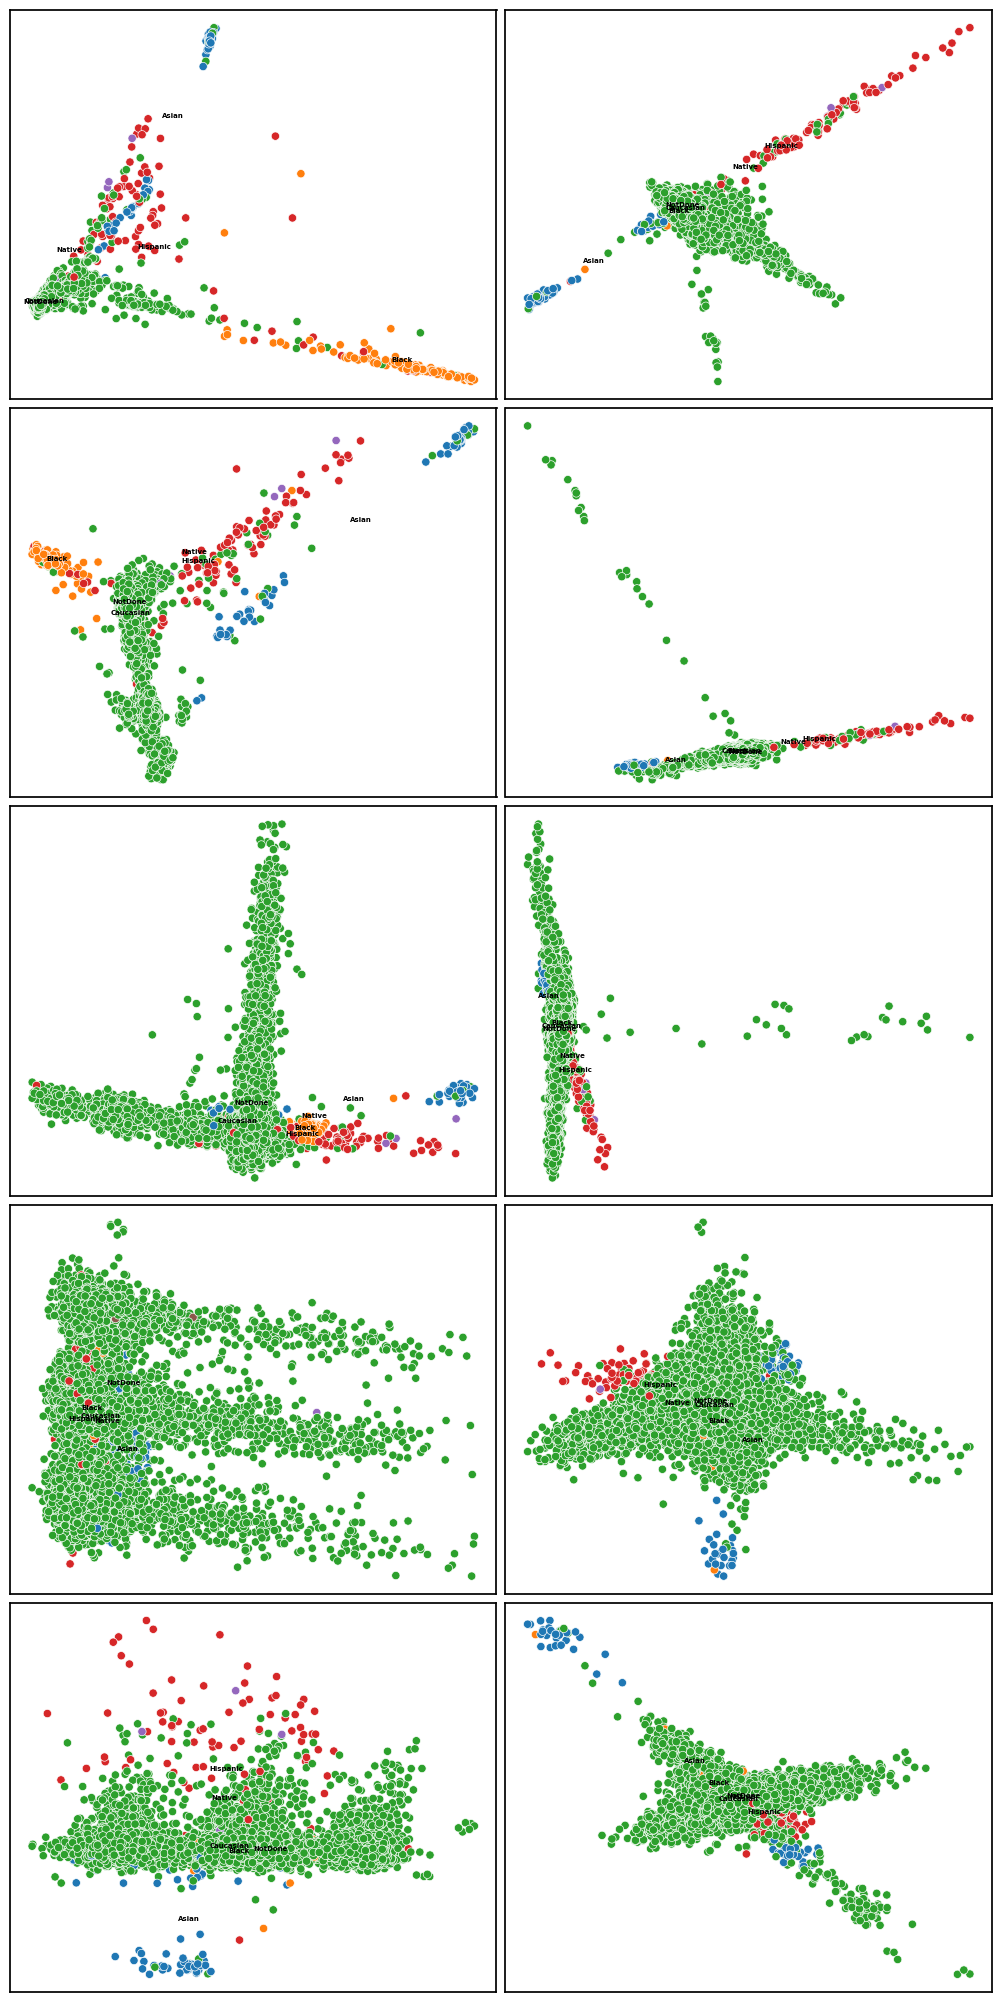

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

comp = 0
for j in range(2):
    for i in range(5):
        # initial 2D phate embedding
        plotting.plot_embeddings(pca_input[:,comp:(comp+2)], 
                                 metadata_mhi['selfreported_pop'].values, 
                                 None,
                                 pop_pallette_mhi,
                                 label_order_mhi,
                                 True,
                                 ax[i,j])
        comp += 1
plt.tight_layout()

In [21]:
# initial phate embedding
phate_operator = phate.PHATE(random_state=42, knn=5, decay=60, n_pca=None)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

Running PHATE on 16672 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 22.42 seconds.
  Calculating affinities...
  Calculated affinities in 3.44 seconds.
Calculated graph and diffusion operator in 25.91 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 1.62 seconds.
  Calculating KMeans...
  Calculated KMeans in 3.30 seconds.
Calculated landmark operator in 5.93 seconds.
Calculating optimal t...
  Automatically selected t = 18
Calculated optimal t in 3.57 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.74 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.30 seconds.


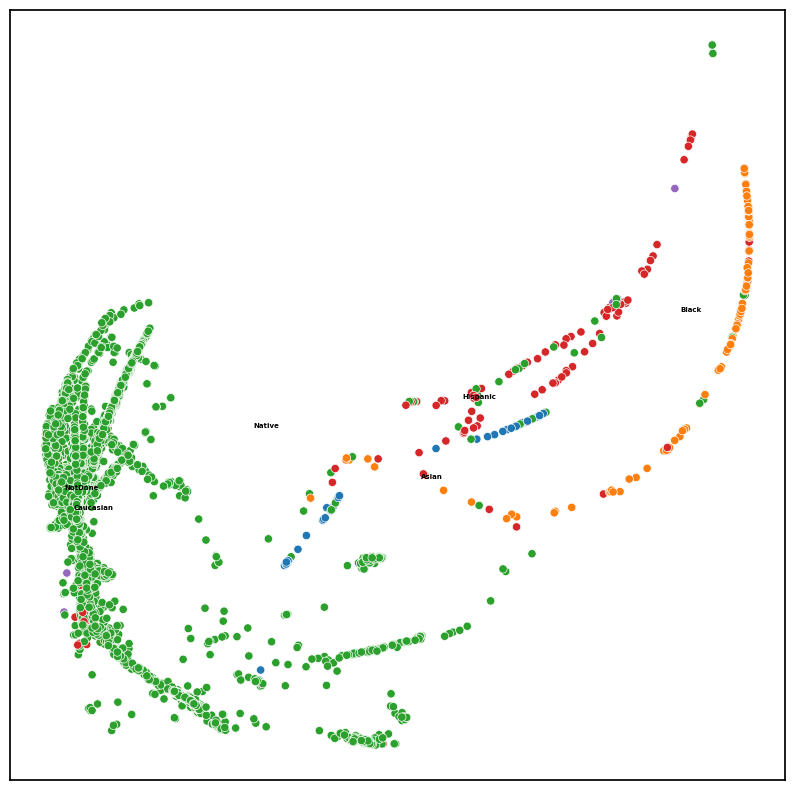

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
plotting.plot_embeddings(phate_emb, 
                         metadata_mhi['selfreported_pop'].values, 
                         None,
                         pop_pallette_mhi,
                         label_order_mhi,
                         True,
                         ax)

In [26]:
# different t experiments
embs_wrt_t = []
for i,t in enumerate([1,5,10,30]):
    phate_operator = phate.PHATE(random_state=42, knn=5, decay=60, t=t, n_pca=None)
    phate_operator.fit(pca_input)
    phate_emb = phate_operator.transform()
    embs_wrt_t.append(phate_emb)

Running PHATE on 16672 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 23.27 seconds.
  Calculating affinities...
  Calculated affinities in 3.18 seconds.
Calculated graph and diffusion operator in 26.48 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 1.35 seconds.
  Calculating KMeans...
  Calculated KMeans in 3.64 seconds.
Calculated landmark operator in 6.00 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.03 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.40 seconds.
Running PHATE on 16672 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 23.28 seconds.
  Calculating affinities...
  Calculated affinities in 3.15 seconds.
Calculated graph and diffusion operator in 26.46 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculate

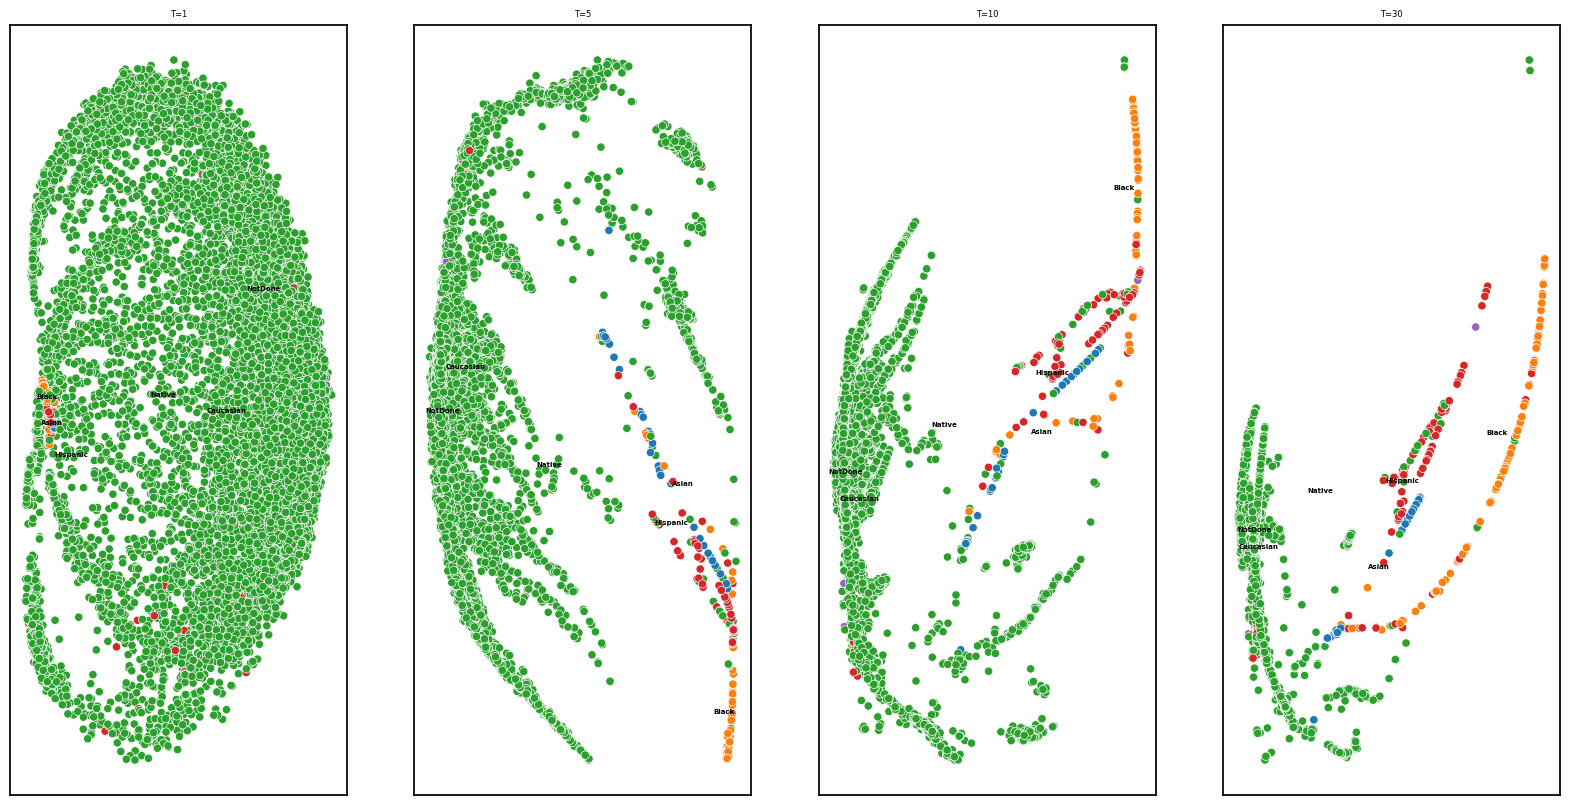

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,10))
for i,t in enumerate([1,5,10,30]):
    plotting.plot_embeddings(embs_wrt_t[i], 
                             metadata_mhi['selfreported_pop'].values, 
                             None,
                             pop_pallette_mhi,
                             label_order_mhi,
                             True,
                             ax[i])
    ax[i].set_title('T={}'.format(t))

Running PHATE on 16672 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 32.07 seconds.
  Calculating affinities...
  Calculated affinities in 2.01 seconds.
Calculated graph and diffusion operator in 34.67 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 17.97 seconds.
  Calculating KMeans...
  Calculated KMeans in 4.66 seconds.
Calculated landmark operator in 29.32 seconds.
Calculating optimal t...
  Automatically selected t = 6
Calculated optimal t in 3.96 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.04 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.38 seconds.


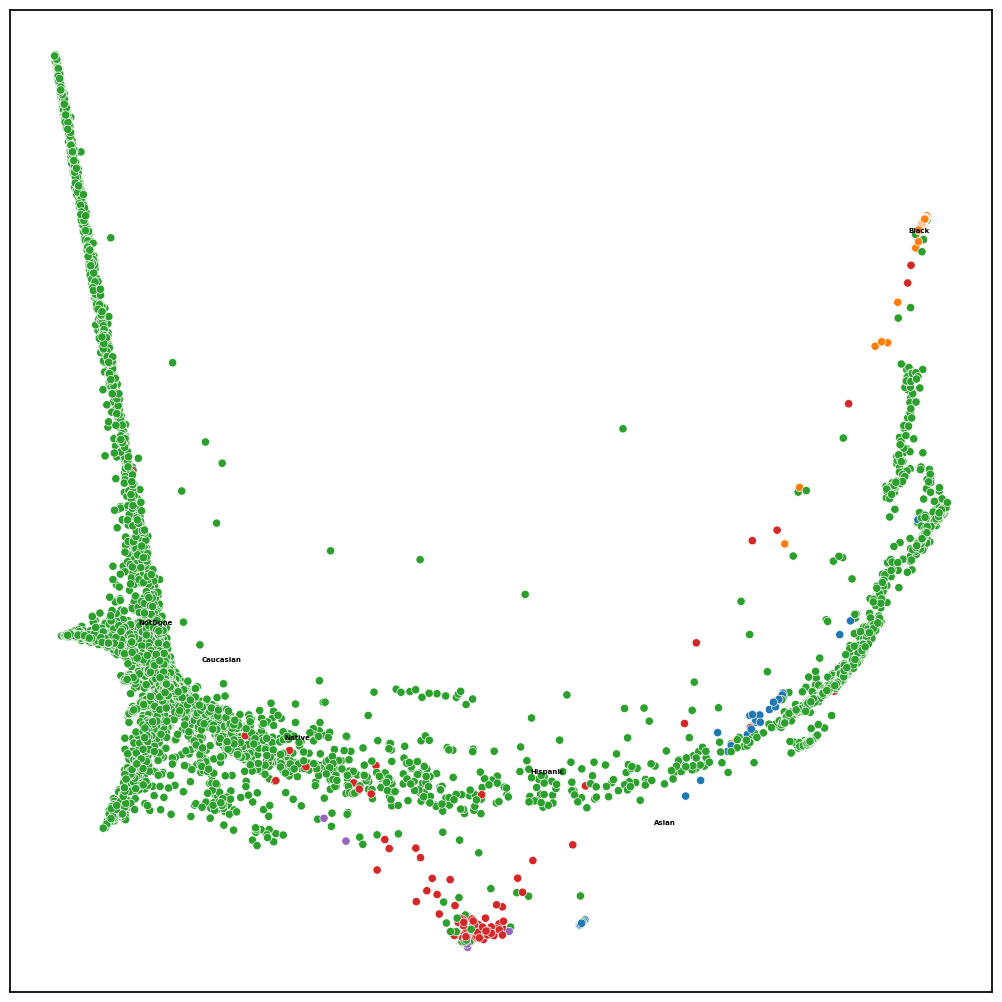

In [28]:
# big knn phate embedding
phate_operator = phate.PHATE(random_state=42, knn=200, decay=60, n_pca=None)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

fig, ax = plt.subplots(figsize=(10,10))
plotting.plot_embeddings(phate_emb, 
                         metadata_mhi['selfreported_pop'].values, 
                         None,
                         pop_pallette_mhi,
                         label_order_mhi,
                         True,
                         ax)
plt.tight_layout()

Running PHATE on 16672 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 23.14 seconds.
  Calculating affinities...
  Calculated affinities in 137.56 seconds.
Calculated graph and diffusion operator in 167.98 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 202.18 seconds.
  Calculating KMeans...
  Calculated KMeans in 14.09 seconds.
Calculated landmark operator in 322.64 seconds.
Calculating optimal t...
  Automatically selected t = 11
Calculated optimal t in 3.87 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.71 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.61 seconds.


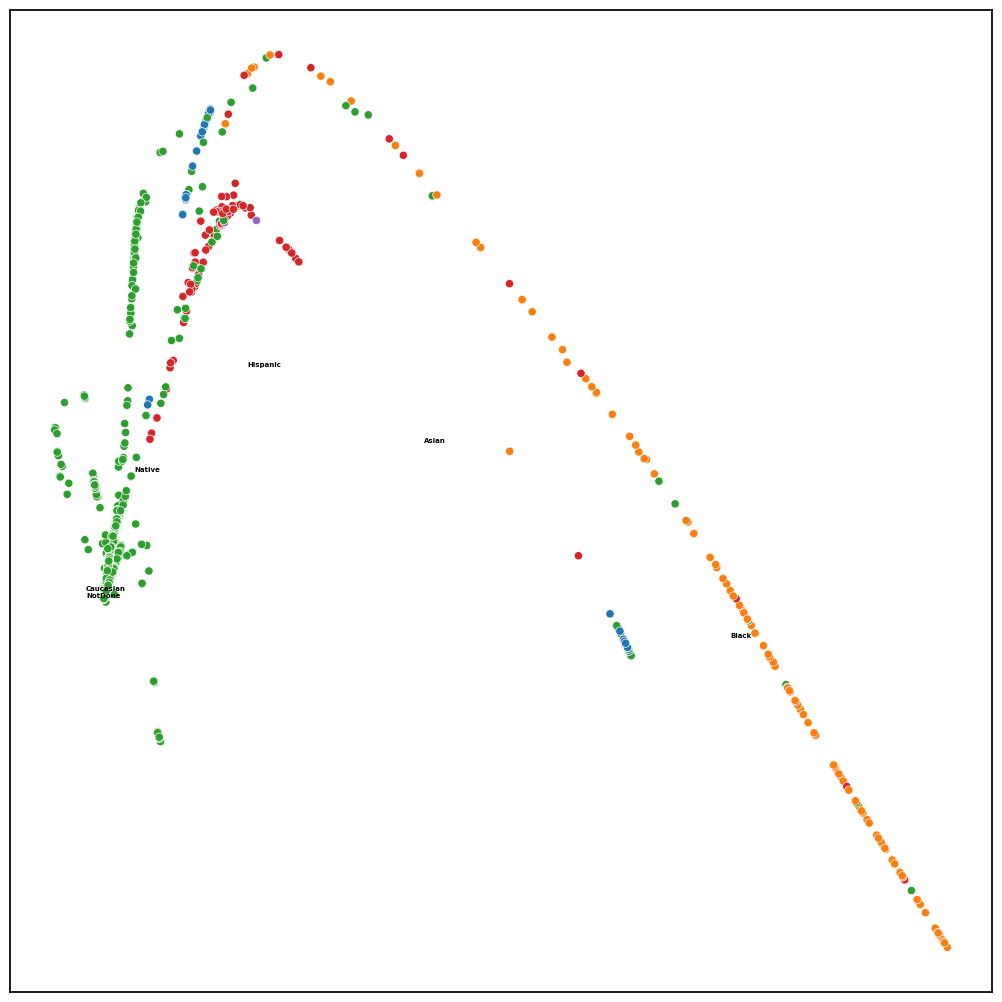

In [29]:
# small decay phate embedding
phate_operator = phate.PHATE(random_state=42, knn=5, decay=5, n_pca=None)
phate_operator.fit(pca_input)
phate_emb = phate_operator.transform()

fig, ax = plt.subplots(figsize=(10,10))
plotting.plot_embeddings(phate_emb, 
                         metadata_mhi['selfreported_pop'].values, 
                         None,
                         pop_pallette_mhi,
                         label_order_mhi,
                         True,
                         ax)
plt.tight_layout()